zenmatch_cover.jpg

# Analysis of User Reviews for Zen Match by Moon Active
This notebook aims to analyze user reviews of the mobile game Zen Match by Moon Active. The purpose of this analysis is to extract actionable insights from user feedback, enabling the company to make informed decisions that enhance the game's quality, user experience, and overall satisfaction.

**Objectives:**

- Understand User Sentiments: Perform sentiment analysis to gauge users' overall perception of the game.
- Identify Recurring Themes: Use natural language processing (NLP) to uncover common topics and themes in the reviews.

**Highlight Strengths and Weaknesses:**

- Pinpoint aspects of the game that users love and areas where they face challenges or express dissatisfaction.

**Provide Actionable Recommendations:**

- Translate findings into data-driven recommendations for the development and marketing teams.

## Planned Approach:
1. Exploratory Data Analysis (EDA):

  - Load and preprocess the dataset of reviews.
  - Analyze the distribution of ratings and review lengths.
  - Visualize trends in user feedback, such as changes over time or by app version.
2. Natural Language Processing (NLP):

  - Clean and preprocess review text for analysis.
  - Conduct sentiment analysis to classify reviews as positive, negative, or neutral.
  - Use topic modeling to uncover the main themes discussed by users.
  - Identify frequently used keywords and their sentiment associations.

3. Insights and Recommendations:

 - Summarize the main findings.
 - Offer actionable insights based on patterns observed in the data.
 - Suggest strategies to improve user satisfaction and address concerns raised in reviews.

##Data description
The dataset contains user reviews of the mobile game Zen Match by Moon Active, collected through a custom web scraper utilizing the Google Play API. The data spans reviews from users across various countries, reflecting a diverse range of perspectives.

## Expected Outcomes:
- A detailed understanding of user sentiments and feedback trends.
- Identification of key drivers of positive and negative reviews.
- A set of actionable recommendations to guide product improvement and enhance user retention.

By leveraging data science techniques, this notebook will provide Moon Active with the insights needed to prioritize updates and tailor their strategies to meet the expectations of Zen Match players. Let's begin!

At first, let's install the required libraries for text translation and progress tracking.
Then, we'll import the necessary libraries for data analysis, visualization, and text processing.

In [2]:
!pip install googletrans==3.1.0a0
!pip install tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=e349a980f465d1e057f18ef62d40972c60ee0316425e26c2d3d8f11d0835bc5c
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## EDA
Next, let's mount Google Drive to access the dataset stored there.

We'll then load the reviews dataset into a pandas DataFrame for analysis.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/exoticmatch_reviews.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369420 entries, 0 to 369419
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         369420 non-null  object 
 1   userName   369420 non-null  object 
 2   userImage  369420 non-null  object 
 3   date       369420 non-null  object 
 4   score      369420 non-null  int64  
 5   scoreText  369420 non-null  int64  
 6   url        369420 non-null  object 
 7   title      0 non-null       float64
 8   text       369413 non-null  object 
 9   replyDate  57681 non-null   object 
 10  replyText  57681 non-null   object 
 11  version    322478 non-null  object 
 12  thumbsUp   369420 non-null  int64  
 13  criterias  369420 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 39.5+ MB


The dataset has 369,420 rows and 14 columns, including review details (`id`, `userName`, `date`, `text`, `score`), developer replies (`replyDate`, `replyText`), app version, and likes (`thumbsUp`).
Some columns, like `title`, are entirely null, while others have partial data.

In [ ]:
df.head(5)

id            userName  \
0  31aef802-c975-425f-adb3-21fb6f1a4c72    Köhler Raugundis   
1  07b942dd-71dd-40ab-a98f-35239b950f8b         Dieter Bahn   
2  b8dc0700-95c0-4339-b365-9653e66cb44a    Mehrnaz Sharifat   
3  2212bd50-638c-49c4-adf0-e49a16d3895a       Katja Stephan   
4  8cdf2b2f-2027-4bed-a1a4-5332004e353c  Manuela Lehmkühler   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                       date  score  scoreText  \
0  2024-12-05T09:38:05.572Z      4          4   
1  2024-12-04T13:16:29.593Z      5          5   
2  2024-12-03T22:54:36.257Z      5          5   
3  2024-12-03T14:55:47.613Z      5          5   
4  2024-12-02T15:46:16.211Z      5          5   

                                                 url  title  \
0  https://play.google.com/store/apps/details?id=...    NaN   
1  https://play.google.com/store/apps/details?id=...    NaN   
2  https://play.google.com/store/apps/details?id=...    NaN   
3  https://play.google.com/store/apps/details?id=...    NaN   
4  https://play.google.com/store/apps/details?id=...    NaN   

                                               text                 replyDate  \
0  es macht auf jeden Fall Spaß versucht es einfach  2024-12-05T14:38:26.192Z   
1                                  gut zum chillen!  2024-12-04T14:22:52.455Z   
2                  gegen Zeit spielen war sehr gut.  2024-12-04T06:21:55.350Z   
3                                         Top Spiel  2024-12-03T16:57:20.713Z   
4                                           super 👍  2024-12-02T21:43:38.206Z   

                                           replyText       version  thumbsUp  \
0  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0   
1  Wir lieben es, das zu hören! 🙂 Vielen Dank für...           NaN         0   
2  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0   
3  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0   
4  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.391         0   

  criterias  
0        []  
1        []  
2        []  
3        []  
4        []

Let's drop unnecessary columns (`userName`, `userImage`, `scoreText`, `url`, `title`, `criterias`) to simplify the dataset.

Then, convert the `date` column to datetime format for easier analysis of review timestamps.

In [ ]:
df.drop(columns=['userName', 'userImage', 'scoreText', 'url', 'title', 'criterias'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

id                             date  \
0  31aef802-c975-425f-adb3-21fb6f1a4c72 2024-12-05 09:38:05.572000+00:00   
1  07b942dd-71dd-40ab-a98f-35239b950f8b 2024-12-04 13:16:29.593000+00:00   
2  b8dc0700-95c0-4339-b365-9653e66cb44a 2024-12-03 22:54:36.257000+00:00   
3  2212bd50-638c-49c4-adf0-e49a16d3895a 2024-12-03 14:55:47.613000+00:00   
4  8cdf2b2f-2027-4bed-a1a4-5332004e353c 2024-12-02 15:46:16.211000+00:00   

   score                                              text  \
0      4  es macht auf jeden Fall Spaß versucht es einfach   
1      5                                  gut zum chillen!   
2      5                  gegen Zeit spielen war sehr gut.   
3      5                                         Top Spiel   
4      5                                           super 👍   

                  replyDate  \
0  2024-12-05T14:38:26.192Z   
1  2024-12-04T14:22:52.455Z   
2  2024-12-04T06:21:55.350Z   
3  2024-12-03T16:57:20.713Z   
4  2024-12-02T21:43:38.206Z   

                                           replyText       version  thumbsUp  
0  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0  
1  Wir lieben es, das zu hören! 🙂 Vielen Dank für...           NaN         0  
2  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0  
3  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0  
4  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.391         0

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

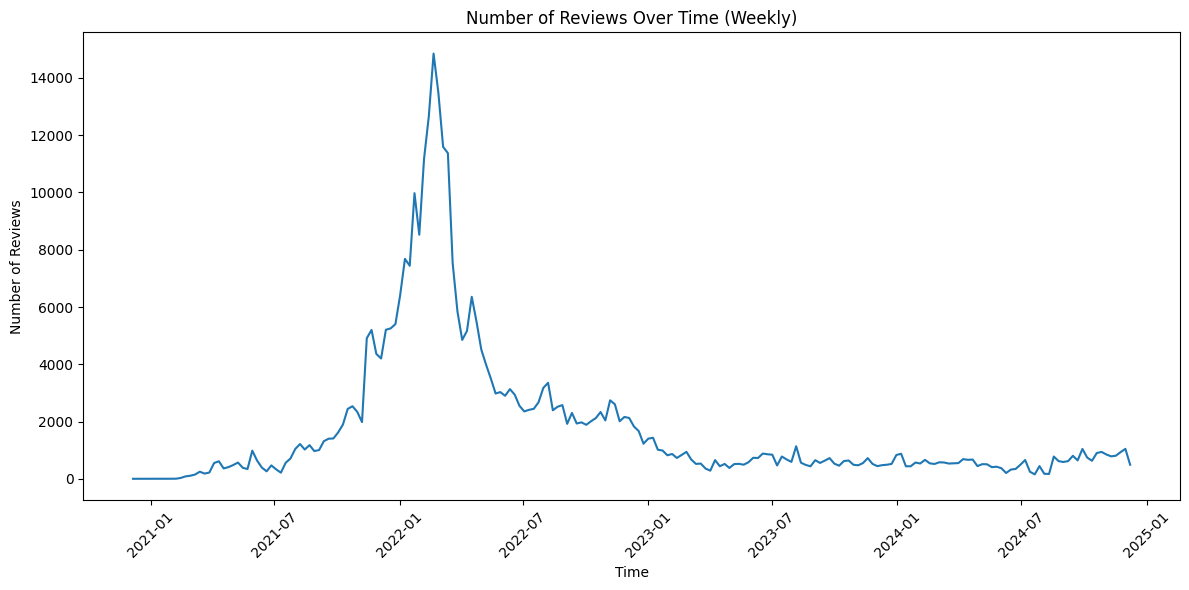

In [ ]:
# @title Time-series Analysis

# Set the 'date' column as the index
df = df.set_index('date')

# Resample the data to weekly granularity and count the number of reviews
weekly_reviews = df['text'].resample('W').count()


# Create the lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_reviews.index, y=weekly_reviews.values)
plt.xlabel("Time")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews Over Time (Weekly)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot shows a significant spike in user reviews in early 2022 followed by a sharp decline and a stabilization at lower levels. Here are some possible assumptions to explain this explosive growth and drop:

- The app might have experienced a major release attracting a large influx of users and reviews.
- A targeted marketing campaign or promotional offer could have significantly boosted user engagement during that period.
- The app or product might have gone viral, leading to sudden high user adoption and engagement.
- External events, like COVID-19 trends might have driven temporary surges.

In [ ]:
# Calculate the average rating for each week
weekly_average_rating = df['score'].resample('W').mean()

# Create the lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_average_rating.index, y=weekly_average_rating.values)
plt.xlabel("Time")
plt.ylabel("Average Rating")
plt.title("Average Rating Over Time (Weekly)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The ratings exhibit large fluctuations early in the timeline (2021). This could indicate inconsistent user feedback, possibly due to early product development stages or issues.
- From 2022, ratings stabilized around 3.0–3.5. By 2023, a clear upward trend appears, reflecting improved user satisfaction.
- There’s a significant dip in ratings around mid-2024 followed by a sharp recovery. Possible causes could be temporary product issues, a major release or a rebranding

In [ ]:
monthly_ratings = df.groupby([pd.Grouper(freq='M'), 'score']).size().unstack(fill_value=0)

# Create the stacked barplot
monthly_ratings.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.xlabel("Month")
plt.ylabel("Number of Ratings")
plt.title("Rating Distribution Over Time (Monthly)")
plt.xticks(rotation=90)
plt.legend(title="Rating")
plt.tight_layout()
plt.show()

In [ ]:
# Extract day of the week and hour of day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['hour_of_day'] = df['date'].dt.hour

# Create a cross-tabulation of day of week and hour of day
review_counts = pd.crosstab(df['day_of_week'], df['hour_of_day'])

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(review_counts, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Reviews'})
plt.xlabel("Hour of Day")
plt.yticks(plt.yticks()[0], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.ylabel("Day of Week")
plt.title("Number of Reviews by Day of Week and Hour of Day")
plt.tight_layout()
plt.show()

Darker blue areas on the heatmap indicate higher numbers of reviews. This indicates that users are most active in leaving reviews during the evening hours, especially on weekends. As we can see, the highest review activity occurs between 17:00 and 20:00 across all days, with a noticeable peak around 18:00–19:00. Sunday and Saturday have consistently high review counts during peak hours.

In [ ]:
# @title Translating reviews

from googletrans import Translator
from time import sleep
translator = Translator()
from tqdm import tqdm
tqdm.pandas()

def translate_text(text):
    try:
        translated_text = translator.translate(text, dest='en')
        return (translated_text.text, translated_text.src)
    except Exception as e:
        sleep(10)
        translated_text = translator.translate(text, dest='en')
        return (translated_text.text, translated_text.src)

In [ ]:
df[['translated_review', 'language']] = df['text'].progress_apply(translate_text).apply(pd.Series)

 70%|██████▉   | 257569/369420 [2:09:33<41:02, 45.42it/s]

We translate reviews to ensure that all user feedback, regardless of the original language, can be analyzed consistently in a single language (English).
This enables more accurate sentiment analysis, topic modeling, and other text-based analyses by standardizing the input data. For this purpose, we define a `translate_text` function to translate reviews to English and handle errors.

In [ ]:
language_counts = df['language'].unique()
print(language_counts)

['de' 'en' 'et' 'pt' 'fi' 'nl' 'no' 'ru' 'lb' 'sq' 'es' 'eo' 'it' 'af'
 'da' 'hmn' 'pl' 'la' 'haw' 'co' 'cs' 'hr' 'tr' 'id' 'az' 'ms' 'hi' 'sw'
 'tl' 'ha' 'ro' 'ar' 'bg' 'mn' 'sr' 'el' 'km' 'zh-CN' 'bs' 'sk' 'fr' 'ceb'
 'lv' 'br' 'so' 'mt' 'lus' 'vi' 'eu' 'hu' 'is' 'gu' 'ga' 'ace' 'jw' 'su'
 'bew' 'ig' 'om' 'mi' 'wo' 'iba' 'mad' 'te' 'ilo' 'ja' 'ak' 'min' 'mg'
 'ktu' 'lua' 'fa' 'ur' 'iw' 'sv' 'gv' 'lij' 'uk' 'kk' 'lt' 'sl' 'uz' 'cy'
 'fy' 'ny' 'ht' 'nso' 'oc' 'pt-PT' 'sm' 'tiv' 'tk' 'mk' 'sah' 'ky' 'be'
 'ko' 'sd' 'ps' 'ckb' 'ca' 'yo' 'sn' 'kn' 'xh' 'hy' 'gl' 'th' 'bn' 'ka'
 'trp' 'zu' 'mr' 'ml' 'ta' 'aa' 'st' 'ku' 'tg']


Now we can see list of distinct laguages languages codes.

In [ ]:
languages = {
    'de': 'German', 'en': 'English', 'et': 'Estonian', 'pt': 'Portuguese', 'fi': 'Finnish', 'nl': 'Dutch', 'no': 'Norwegian', 'ru': 'Russian', 'lb': 'Luxembourgish', 'sq': 'Albanian', 'es': 'Spanish', 'eo': 'Esperanto',
    'it': 'Italian', 'af': 'Afrikaans', 'da': 'Danish', 'hmn': 'Hmong', 'pl': 'Polish', 'la': 'Latin', 'haw': 'Hawaiian', 'co': 'Corsican', 'cs': 'Czech', 'hr': 'Croatian', 'tr': 'Turkish', 'id': 'Indonesian',
    'az': 'Azerbaijani', 'ms': 'Malay', 'hi': 'Hindi', 'sw': 'Swahili', 'tl': 'Tagalog', 'ha': 'Hausa', 'ro': 'Romanian', 'ar': 'Arabic', 'bg': 'Bulgarian', 'mn': 'Mongolian', 'sr': 'Serbian', 'el': 'Greek',
    'km': 'Khmer', 'zh-CN': 'Chinese (Simplified)', 'bs': 'Bosnian', 'sk': 'Slovak', 'fr': 'French', 'ceb': 'Cebuano', 'lv': 'Latvian', 'br': 'Breton', 'so': 'Somali', 'mt': 'Maltese', 'lus': 'Mizo', 'vi': 'Vietnamese',
    'eu': 'Basque', 'hu': 'Hungarian', 'is': 'Icelandic', 'gu': 'Gujarati', 'ga': 'Irish', 'ace': 'Achinese', 'jw': 'Javanese', 'su': 'Sundanese', 'bew': 'Betawi', 'ig': 'Igbo', 'om': 'Oromo', 'mi': 'Māori', 'wo': 'Wolof',
    'iba': 'Iban', 'mad': 'Madurese', 'te': 'Telugu', 'ilo': 'Ilocano', 'ja': 'Japanese', 'ak': 'Akan', 'min': 'Minangkabau', 'mg': 'Malagasy', 'ktu': 'Kikuyu', 'lua': 'Luba-Kasai', 'fa': 'Persian', 'ur': 'Urdu',
    'iw': 'Hebrew', 'sv': 'Swedish', 'gv': 'Manx', 'lij': 'Ligurian', 'uk': 'Ukrainian', 'kk': 'Kazakh', 'lt': 'Lithuanian', 'sl': 'Slovene', 'uz': 'Uzbek', 'cy': 'Welsh', 'fy': 'Frisian', 'ny': 'Chichewa',
    'ht': 'Haitian Creole', 'nso': 'Northern Sotho', 'oc': 'Occitan', 'pt-PT': 'Portuguese (Portugal)', 'sm': 'Samoan', 'tiv': 'Tiv', 'tk': 'Turkmen', 'mk': 'Macedonian', 'sah': 'Yakut', 'ky': 'Kyrgyz', 'be': 'Belarusian',
    'ko': 'Korean', 'sd': 'Sindhi', 'ps': 'Pashto', 'ckb': 'Central Kurdish', 'ca': 'Catalan', 'yo': 'Yoruba', 'sn': 'Shona', 'kn': 'Kannada', 'xh': 'Xhosa', 'hy': 'Armenian', 'gl': 'Galician', 'th': 'Thai', 'bn': 'Bengali',
    'ka': 'Georgian', 'trp': 'Tropeano', 'zu': 'Zulu', 'mr': 'Marathi', 'ml': 'Malayalam', 'ta': 'Tamil', 'aa': 'Afar', 'st': 'Southern Sotho', 'ku': 'Kurdish', 'tg': 'Tajik'
}

We can ask ChatGPT, Gemini or another GenAI to create a dictionary with countries names for these codes to save time.

Now, let's identify the most popular languages of customer reviews by counting the occurrences of each language code.

In [ ]:
# @title Language Analysis
language_counts = df['language'].value_counts()
language_counts_df = language_counts.reset_index()
language_counts_df.columns = ['language_code', 'Count']
language_counts_df['language'] = language_counts_df['language_code'].map(languages)


with pd.option_context('display.max_rows', None):
    print(language_counts_df)

    language_code   Count               language
0              en  161349                English
1              de   62256                 German
2              it   21387                Italian
3              es   19266                Spanish
4              nl   18658                  Dutch
5              ru   16922                Russian
6              fr   12853                 French
7              ar   12767                 Arabic
8              pt    9644             Portuguese
9              ko    8212                 Korean
10             id    4815             Indonesian
11             ja    4240               Japanese
12             pl    3403                 Polish
13             el    1688                  Greek
14             vi    1677             Vietnamese
15             fa    1237                Persian
16             uk    1072              Ukrainian
17             ms     937                  Malay
18             sv     842                Swedish
19             ur   

In [ ]:
# Calculate language counts
language_counts = df['language'].value_counts()

# Create a DataFrame for language counts
language_counts_df = language_counts.reset_index()
language_counts_df.columns = ['language_code', 'Count']
language_counts_df['language'] = language_counts_df['language_code'].map(languages)

# Filter languages with count less than 1000
other_languages = language_counts_df[language_counts_df['Count'] < 3600]

# Create a new DataFrame for the pie chart
pie_chart_data = language_counts_df[language_counts_df['Count'] >= 3600]

# Add the 'Other' category
pie_chart_data = pd.concat([pie_chart_data, pd.DataFrame([{'language': 'Other', 'Count': other_languages['Count'].sum()}])], ignore_index=True)

# Create the pie chart
plt.figure(figsize=(8, 12))
wedges, texts, autotexts = plt.pie(
    pie_chart_data['Count'],
    labels=pie_chart_data['language'],
    autopct='%1.1f%%',
    pctdistance=0.9,
    labeldistance=1.05,
    startangle=90,
    wedgeprops={"edgecolor": "k", 'linewidth': 1, 'antialiased': True}
)

# Title
plt.title('Percentage Distribution of Languages in Reviews', fontsize=14)
plt.tight_layout()
plt.show()


The majority of customer reviews are in English, accounting for 43.7% of the total, followed by German at 16.9%. The remaining reviews are spread across various other languages, with Italian (5.8%), Spanish (5.2%), and Dutch (5.1%) being the next most common.

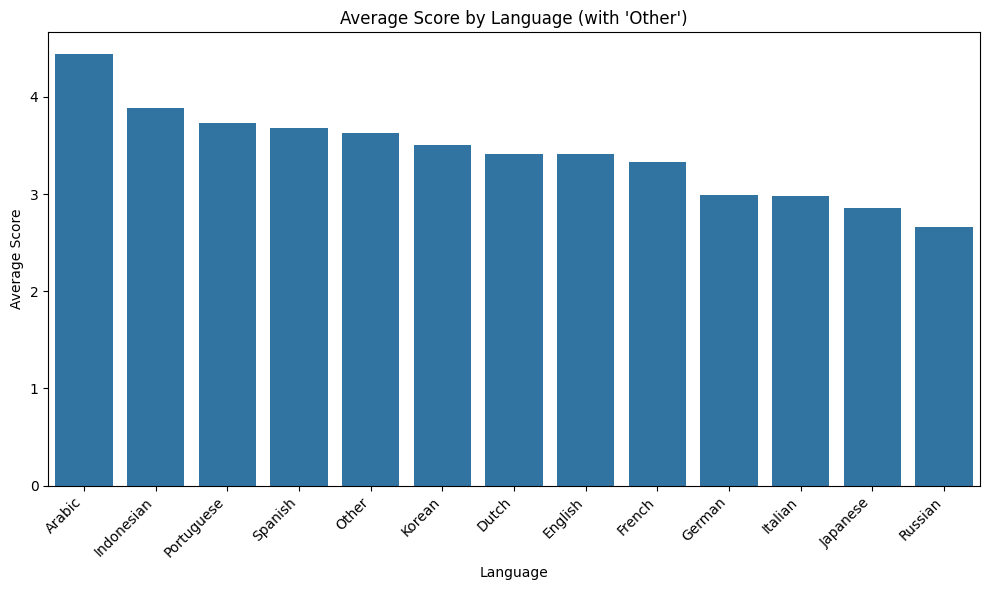

In [ ]:
other_row = pd.DataFrame({'language_code': ['Other'],
                          'Count': [other_languages['Count'].sum()],
                          'language': ['Other']})
language_counts_combined = pd.concat([pie_chart_data, other_row], ignore_index=True)
# Map the grouped languages back to the original data
language_map = dict(zip(language_counts_combined['language_code'], language_counts_combined['language']))
df['language_grouped'] = df['language'].map(language_map).fillna('Other')

# Calculate the average score for each language group
average_score_by_language = df.groupby('language_grouped')['score'].mean().reset_index()

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='language_grouped', y='score', data=average_score_by_language, order=average_score_by_language.sort_values('score', ascending=False)['language_grouped'])
plt.xlabel("Language")
plt.ylabel("Average Score")
plt.title("Average Score by Language")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The highest average review scores are observed in Arabic and Indonesian, with scores above 4.0. In contrast, German, Italian, Japanese, and Russian reviews have the lowest average scores, all below 3.0, indicating less positive feedback in these languages.

In [47]:
# @title Versions analysis
versions_count = df['version'].value_counts()
print(len(versions_count))

240


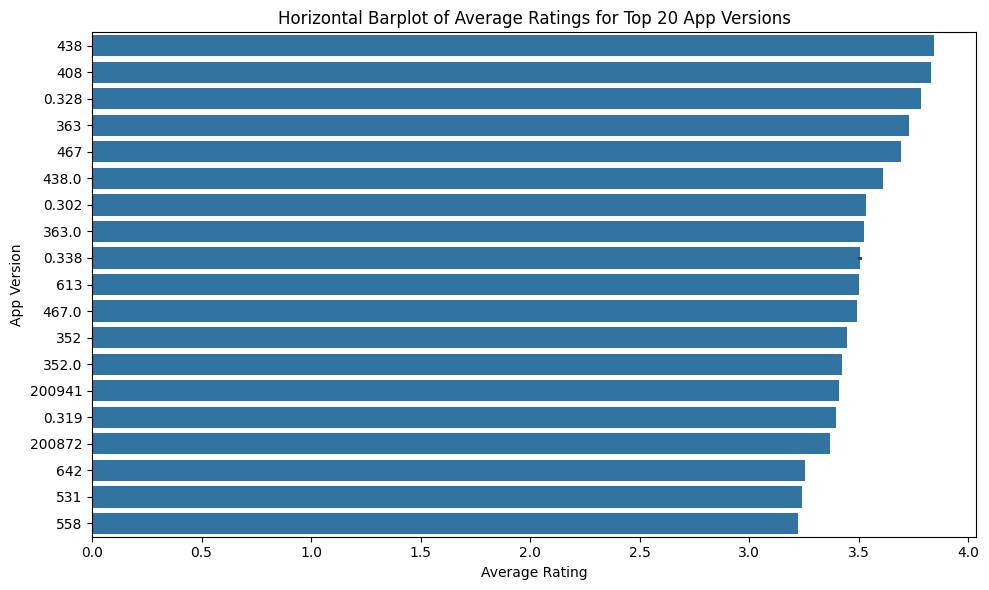

In [ ]:
top_versions = df['version'].value_counts().nlargest(20).index
average_ratings = df[df['version'].isin(top_versions)].groupby('version')['score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.values, y=average_ratings.index, orient='h')
plt.xlabel("Average Rating")
plt.ylabel("App Version")
plt.title("Horizontal Barplot of Average Ratings for Top 20 App Versions")
plt.tight_layout()
plt.show()

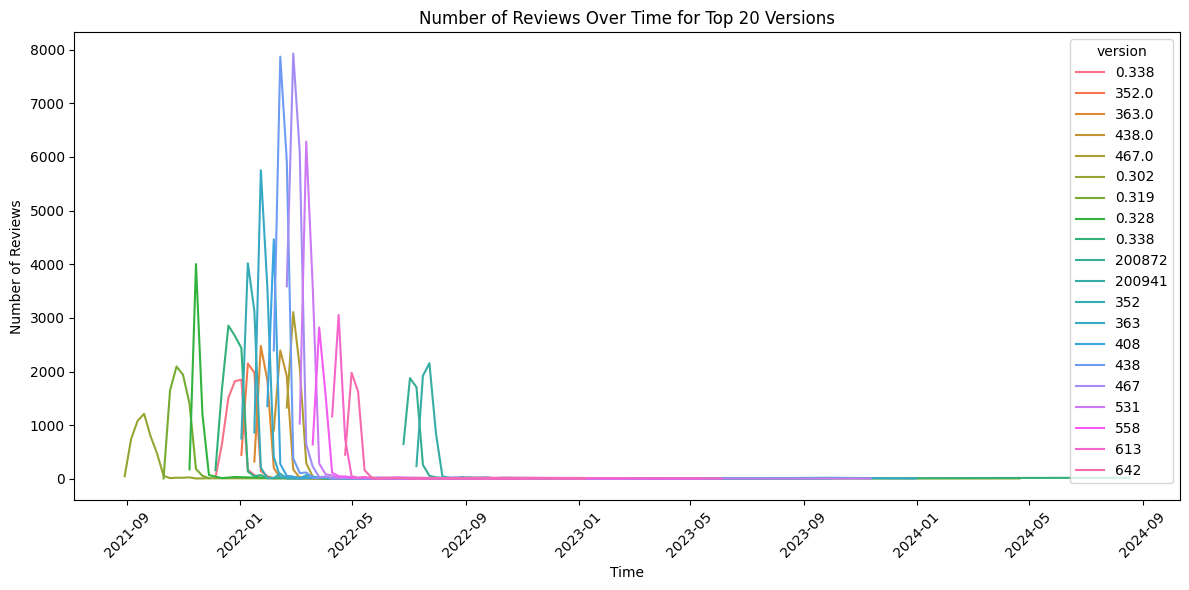

In [ ]:
# Filter the DataFrame to include only the top 5 versions
top_versions_df = df[df['version'].isin(top_versions)]

# Reset the index to include 'date' as a column again
top_versions_df = top_versions_df.reset_index()

# Group by version and date, then count the number of reviews
version_reviews_over_time = top_versions_df.groupby(['version', pd.Grouper(key='date', freq='W')])['score'].count().reset_index()

# Create the lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='score', hue='version', data=version_reviews_over_time)
plt.xlabel("Time")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews Over Time for Top 20 Versions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

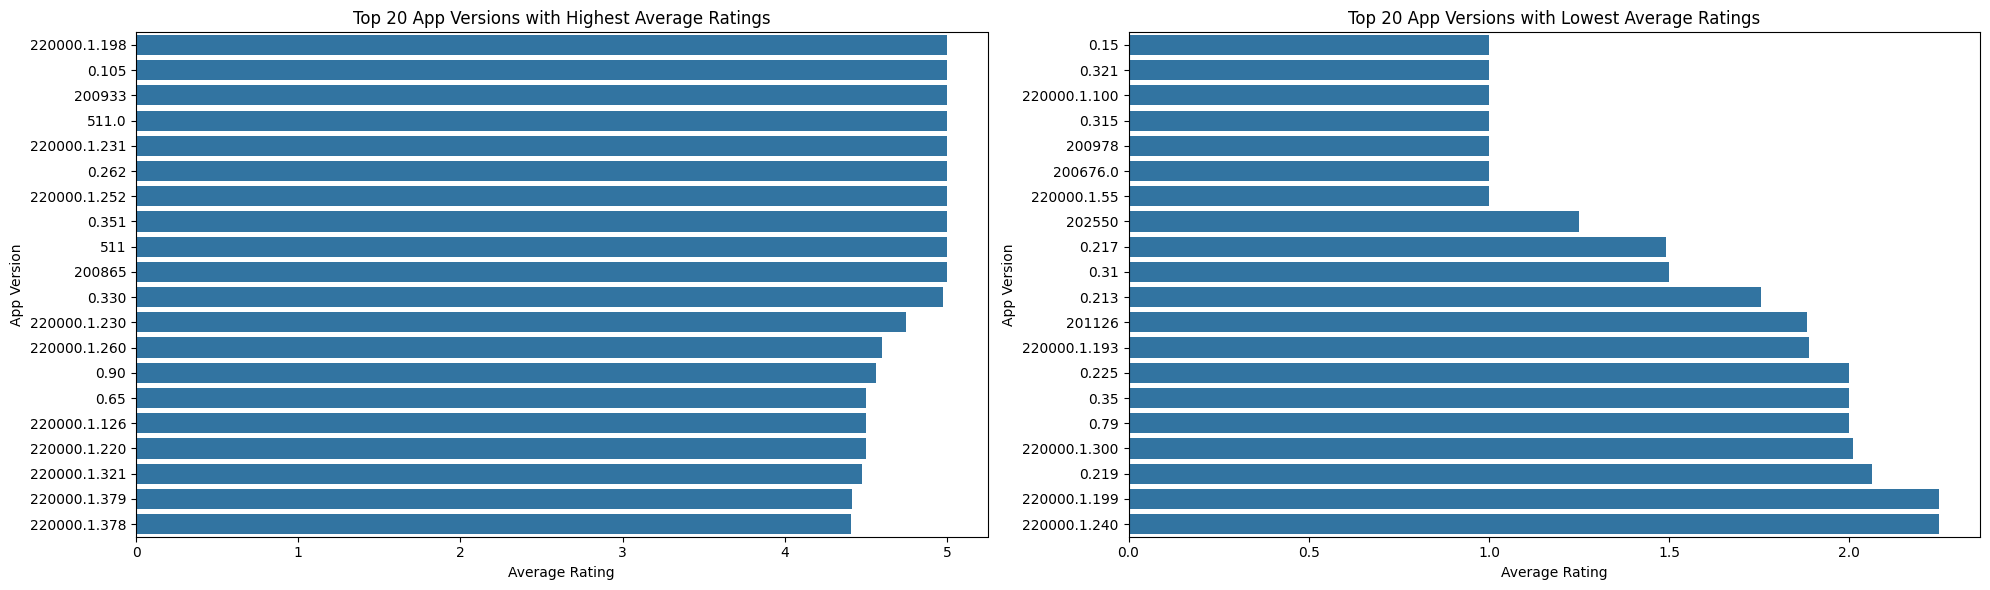

In [ ]:
# Group by version and calculate the average rating
average_rating_by_version = df.groupby('version')['score'].mean().reset_index()

# Sort by average rating in descending order for highest rated versions
top_rated_versions = average_rating_by_version.sort_values('score', ascending=False).head(20)

# Sort by average rating in ascending order for lowest rated versions
lowest_rated_versions = average_rating_by_version.sort_values('score', ascending=True).head(20)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for highest rated versions
sns.barplot(x='score', y='version', data=top_rated_versions, orient='h', ax=axes[0])
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("App Version")
axes[0].set_title("Top 20 App Versions with Highest Average Ratings")

# Plot for lowest rated versions
sns.barplot(x='score', y='version', data=lowest_rated_versions, orient='h', ax=axes[1])
axes[1].set_xlabel("Average Rating")
axes[1].set_ylabel("App Version")
axes[1].set_title("Top 20 App Versions with Lowest Average Ratings")

plt.tight_layout()
plt.show()

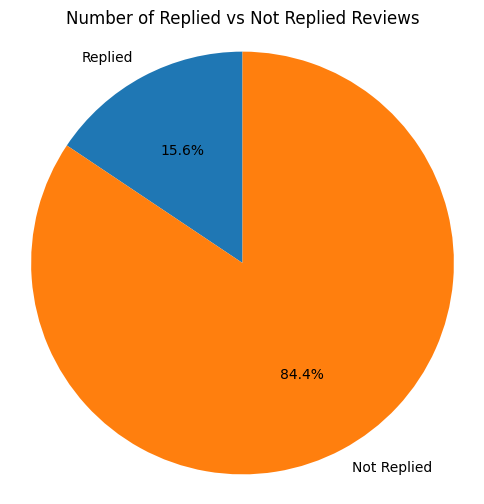

In [ ]:
# @title Developer Feedback Analysis
#Identify size of each segment
replied_reviews = df[df['replyText'].notna()]
num_replied = len(replied_reviews)
num_not_replied = len(df) - num_replied

labels = ['Replied', 'Not Replied']
sizes = [num_replied, num_not_replied]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Number of Replied vs Not Replied Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The piechart shows that only 15.6% of customer reviews have received a reply, while the remaining 84.4% have not been replied to. This highlights a significant opportunity to improve customer engagement by addressing unanswered reviews.

In [ ]:
# Calculate the average score for replied and not replied reviews
average_score_replied = replied_reviews['score'].mean()
average_score_not_replied = df[df['replyText'].isna()]['score'].mean()

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Replied', 'Not Replied'], y=[average_score_replied, average_score_not_replied])
plt.xlabel("Review Type")
plt.ylabel("Average Score")
plt.title("Average Score for Replied vs. Not Replied Reviews")
plt.show()

Replied reviews have a slightly higher average rating compared to reviews without replies, suggesting that developer responses may be associated with more positive feedback.

In [8]:
df['review_length'] = df['translated_review'].apply(len)

In [ ]:
plt.figure(figsize=(18, 6))

# First histogram (original)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(df['review_length'], bins=50, kde=True)
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Lengths")

# Second histogram (filtered)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(df[df['review_length'] < 500]['review_length'], bins=50, kde=True)
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Lengths (less than 500)")

plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.show()

The distribution of review lengths is heavily skewed towards shorter reviews, with most being less than 100 characters and very few exceeding 500

Number of outliers: 27484


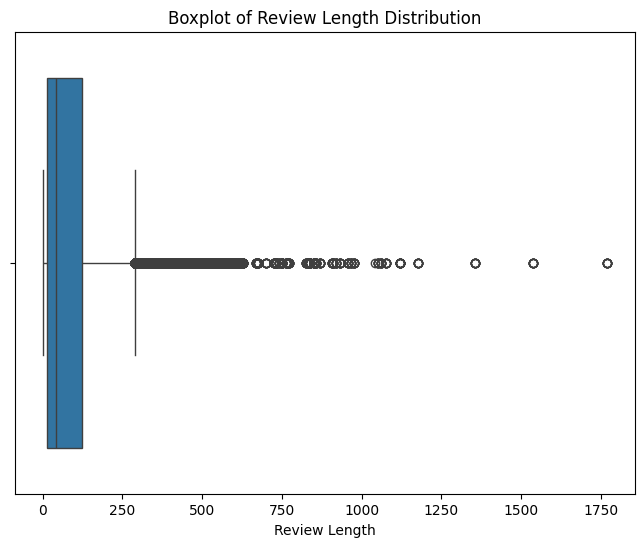

In [14]:
# Calculate Q1, Q3, and IQR
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers: {num_outliers}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['review_length'])
plt.xlabel("Review Length")
plt.title("Boxplot of Review Length Distribution")
plt.show()

The boxplot reinforces that the majority of reviews are short, with the interquartile range (IQR) concentrated below 250 characters. There are numerous outliers extending beyond this range, indicating the presence of longer reviews, but these are rare. This highlights a significant skew in the data, with most reviews being concise.

## Sentiment Analysis

We are using NLTK for sentiment analysis in this notebook because it provides a lightweight, efficient solution for analyzing customer reviews. NLTK's VADER tool is well-suited for sentiment analysis of short, informal text like reviews, and it doesn’t require the computational resources that pretrained models from Hugging Face typically demand. This approach allows for faster processing while still delivering accurate results for the task at hand. However, for more precise outcomes, we could fine-tune a classification model from Hugging Face to better capture domain-specific nuances in the reviews.

Before applying sentiment analysis, we preprocess the review text by removing URLs, email addresses, emojis, punctuation, and stopwords. The text is tokenized, lemmatized, and returned as a cleaned string, ensuring better quality for sentiment analysis and other NLP tasks.

In [ ]:
def text_cleaning(text):
    # Regex to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Regex to match email addresses
    email_pattern = re.compile(r'\S+@\S+\.\S+')
    # Regex to match emojis (simple pattern)
    emoji_pattern = re.compile(
        r'['
        r'\U0001F600-\U0001F64F'  # Emoticons
        r'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
        r'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
        r'\U0001F1E0-\U0001F1FF'  # Flags (iOS)
        r'\U00002702-\U000027B0'  # Dingbats
        r'\U000024C2-\U0001F251'  # Enclosed Characters
        r'\U0001f926-\U0001f937'  # Supplemental Symbols and Pictographs
        r'\U00010000-\U0010ffff'  # Supplementary Private Use Area-A
        r'\u200d'  # Zero Width Joiner
        r'\u2640-\u2642'  # Gender symbols
        r'\u2600-\u2B55'  # Misc symbols and Dingbats
        r'\u23cf'  # Eject Button
        r'\u23e9'  # Fast Forward Button
        r'\u231a'  # Watch
        r'\ufe0f'  # Variation Selector-16
        r'\u3030'  # Wavy Dash
        r']+',
        re.UNICODE
    )

    # Remove URLs
    text = re.sub(url_pattern, '', text)
    # Remove email addresses
    text = re.sub(email_pattern, '', text)
    # Remove emojis
    text = re.sub(emoji_pattern, '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove newlines
    text = text.replace('\n', ' ')

    return text


def preprocess_review(text):
    text = text_cleaning(text)
    if text == 'removed':
        return np.NaN
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [ ]:
df['processed_review'] = df['translated_review'].progress_apply(preprocess_review)

100%|██████████| 369420/369420 [11:51<00:00, 518.87it/s] 


In [ ]:
df.head()

id                             date  \
0  31aef802-c975-425f-adb3-21fb6f1a4c72 2024-12-05 09:38:05.572000+00:00   
1  07b942dd-71dd-40ab-a98f-35239b950f8b 2024-12-04 13:16:29.593000+00:00   
2  b8dc0700-95c0-4339-b365-9653e66cb44a 2024-12-03 22:54:36.257000+00:00   
3  2212bd50-638c-49c4-adf0-e49a16d3895a 2024-12-03 14:55:47.613000+00:00   
4  8cdf2b2f-2027-4bed-a1a4-5332004e353c 2024-12-02 15:46:16.211000+00:00   

   score                                              text  \
0      4  es macht auf jeden Fall Spaß versucht es einfach   
1      5                                  gut zum chillen!   
2      5                  gegen Zeit spielen war sehr gut.   
3      5                                         Top Spiel   
4      5                                           super 👍   

                  replyDate  \
0  2024-12-05T14:38:26.192Z   
1  2024-12-04T14:22:52.455Z   
2  2024-12-04T06:21:55.350Z   
3  2024-12-03T16:57:20.713Z   
4  2024-12-02T21:43:38.206Z   

                                           replyText       version  thumbsUp  \
0  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0   
1  Wir lieben es, das zu hören! 🙂 Vielen Dank für...           NaN         0   
2  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0   
3  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0   
4  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.391         0   

                     translated_review language  day_of_week  hour_of_day  \
0     It's definitely fun, just try it       de            3            9   
1                   good for chilling!       de            2           13   
2  Playing against time was very good.       de            1           22   
3                             Top game       de            1           14   
4                              super 👍       en            0           15   

     processed_review  
0  definitely fun try  
1       good chilling  
2   playing time good  
3            top game  
4               super

In [ ]:
sia = SentimentIntensityAnalyzer()

def define_sentiment(x):
    """
    Analyzes the sentiment of the input text and categorizes it as positive, negative, or neutral.

    Args:
    x (str): The text to be analyzed.

    Returns:
    dict: A dictionary containing sentiment scores and the sentiment category.
    """
    score = sia.polarity_scores(x)
    if score['compound'] > 0:
        score['category'] = 'positive'
    elif score['compound'] < 0:
        score['category'] = 'negative'
    else:
        score['category'] = 'neutral'

    return score

In [ ]:
polarity = df['processed_review'].progress_apply(lambda x: define_sentiment(x)).apply(pd.Series)

df = df.join(polarity)
df['Subjectivity'] = df['processed_review'].progress_apply(lambda x: TextBlob(x).sentiment.subjectivity)

df.head()

100%|██████████| 369420/369420 [01:15<00:00, 4884.46it/s]


id                             date  \
0  31aef802-c975-425f-adb3-21fb6f1a4c72 2024-12-05 09:38:05.572000+00:00   
1  07b942dd-71dd-40ab-a98f-35239b950f8b 2024-12-04 13:16:29.593000+00:00   
2  b8dc0700-95c0-4339-b365-9653e66cb44a 2024-12-03 22:54:36.257000+00:00   
3  2212bd50-638c-49c4-adf0-e49a16d3895a 2024-12-03 14:55:47.613000+00:00   
4  8cdf2b2f-2027-4bed-a1a4-5332004e353c 2024-12-02 15:46:16.211000+00:00   

   score                                              text  \
0      4  es macht auf jeden Fall Spaß versucht es einfach   
1      5                                  gut zum chillen!   
2      5                  gegen Zeit spielen war sehr gut.   
3      5                                         Top Spiel   
4      5                                           super 👍   

                  replyDate  \
0  2024-12-05T14:38:26.192Z   
1  2024-12-04T14:22:52.455Z   
2  2024-12-04T06:21:55.350Z   
3  2024-12-03T16:57:20.713Z   
4  2024-12-02T21:43:38.206Z   

                                           replyText       version  thumbsUp  \
0  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0   
1  Wir lieben es, das zu hören! 🙂 Vielen Dank für...           NaN         0   
2  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0   
3  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.386         0   
4  Wir lieben es, das zu hören! 🙂 Vielen Dank für...  220000.1.391         0   

                     translated_review language  day_of_week  hour_of_day  \
0     It's definitely fun, just try it       de            3            9   
1                   good for chilling!       de            2           13   
2  Playing against time was very good.       de            1           22   
3                             Top game       de            1           14   
4                              super 👍       en            0           15   

     processed_review    neg    neu    pos  compound  category  Subjectivity  
0  definitely fun try  0.000  0.143  0.857    0.7184  positive      0.200000  
1       good chilling  0.275  0.000  0.725    0.4215  positive      0.750000  
2   playing time good  0.000  0.175  0.825    0.5719  positive      0.600000  
3            top game  0.000  0.357  0.643    0.2023  positive      0.450000  
4               super  0.000  0.000  1.000    0.5994  positive      0.666667

TextBlob is used to compute the subjectivity score for each review, helping to understand how much of the content is based on personal views versus objective observations. This can be useful for distinguishing between subjective feedback

In [19]:
def categorize_subjectivity(subjectivity_score):
    if subjectivity_score > 0.5:
        return 'Subjective'
    elif subjectivity_score < 0.5:
        return 'Objective'
    else:
        return 'Neutral'

In [20]:
df['subjectivity_category'] = df['Subjectivity'].apply(categorize_subjectivity)

In [ ]:
df.to_csv('/content/drive/MyDrive/processed_reviews.csv', index=False)

In [16]:
sentiment_colors = {
    'positive': '#4CAF50',
    'negative': '#F44336',
    'neutral': '#FFEB3B',
}

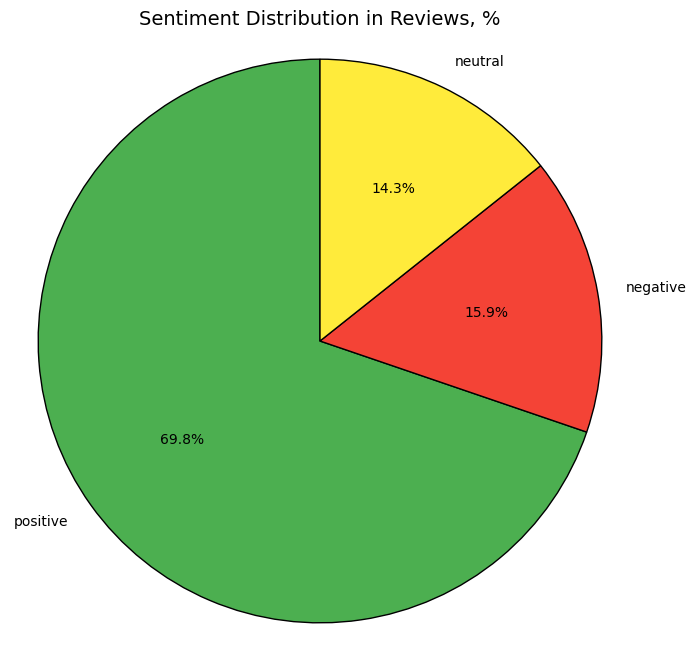

In [18]:
# Count the occurrences of each sentiment category
sentiment_counts = df['category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[sentiment_colors[sentiment] for sentiment in sentiment_counts.index],
    wedgeprops={"edgecolor": "k", 'linewidth': 1, 'antialiased': True}
)

# Title
plt.title('Sentiment Distribution in Reviews, %', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

The sentiment analysis shows that the majority of reviews (69.8%) are positive, indicating overall satisfaction among players. Negative reviews account for 15.9%, suggesting some areas of concern, while 14.3% are neutral, reflecting a balanced or indifferent sentiment. This distribution highlights a generally favorable perception of the game.

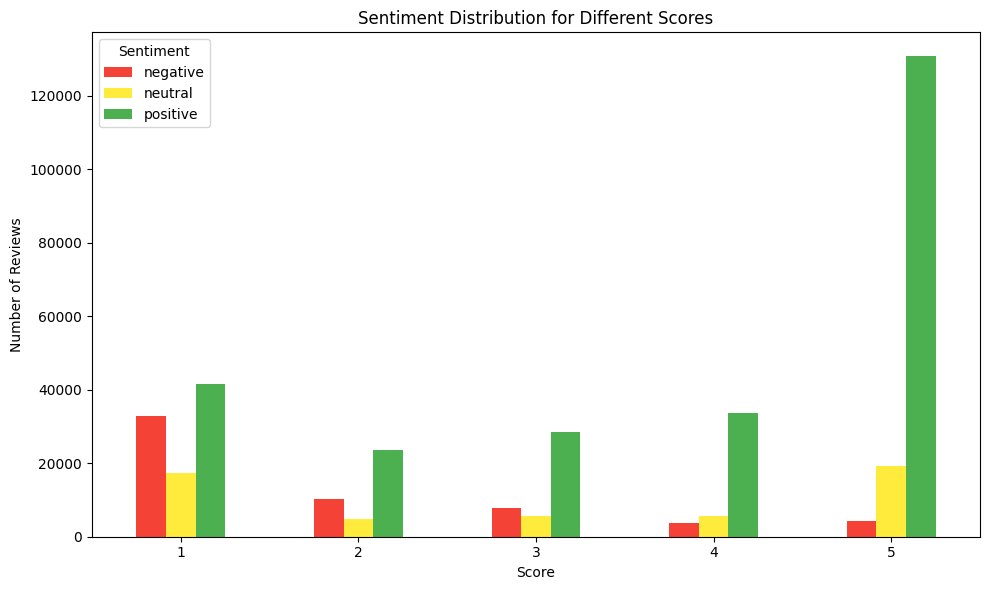

In [ ]:
# Group the data by score and category, then count the occurrences
sentiment_counts = df.groupby(['score', 'category']).size().unstack(fill_value=0)

# Create the multi-bar plot with custom colors
sentiment_counts.plot(kind='bar', figsize=(10, 6),
                      color=[sentiment_colors[col] for col in sentiment_counts.columns])

# Add plot labels and formatting
plt.xlabel("Score")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution for Different Scores")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

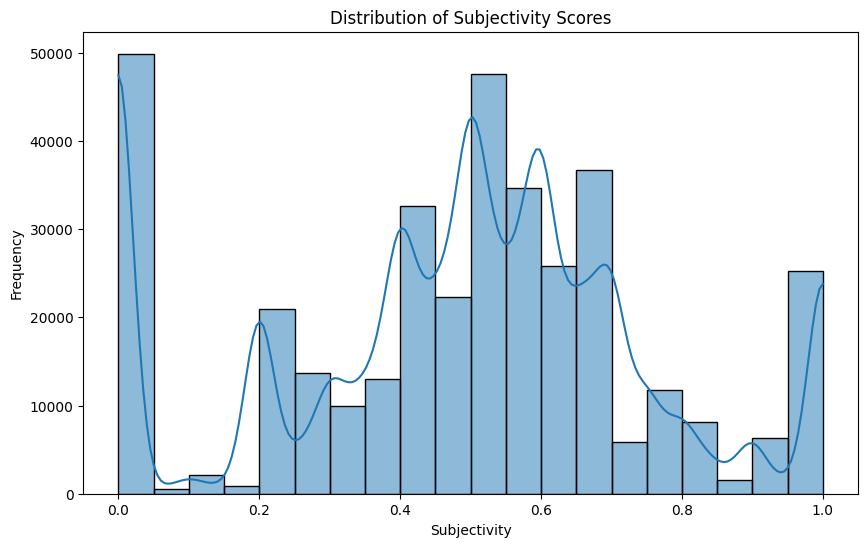

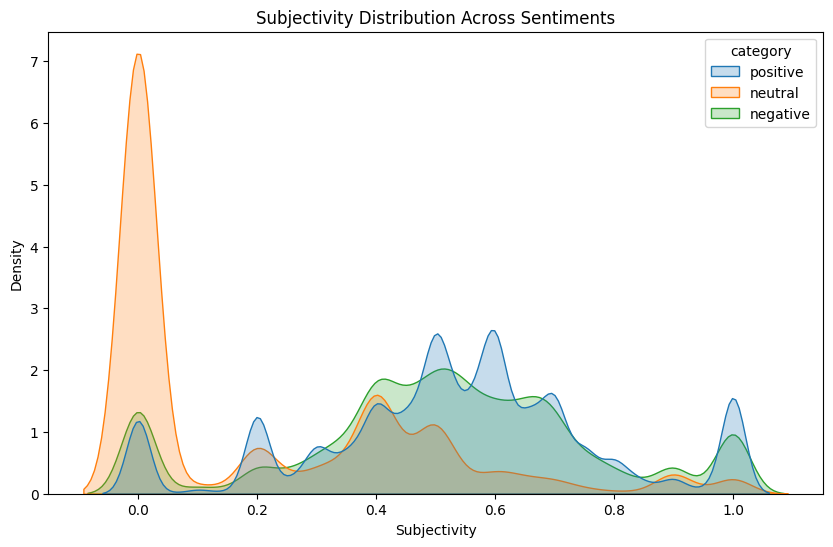

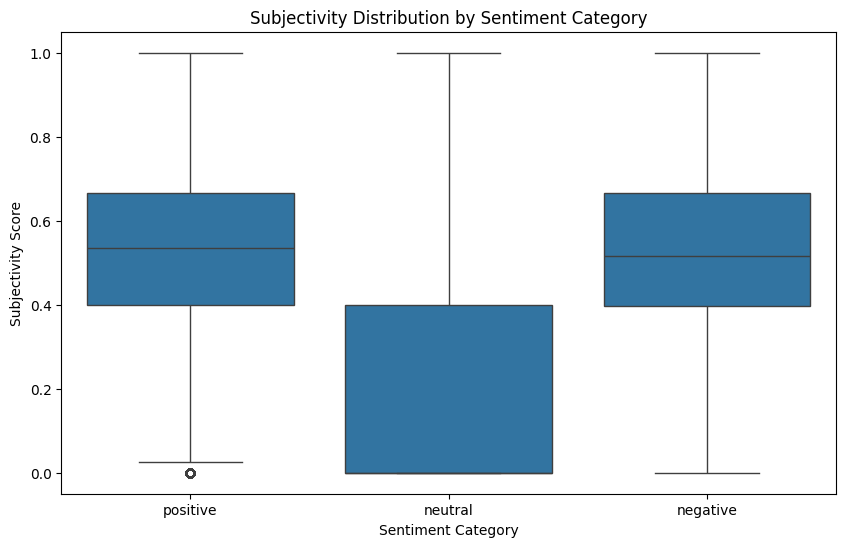

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Subjectivity'], bins=20, kde=True)
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

# Group data by sentiment category and then plot subjectivity distribution for each
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Subjectivity", hue="category", fill=True, common_norm=False)
plt.title('Subjectivity Distribution Across Sentiments')
plt.xlabel('Subjectivity')
plt.ylabel('Density')
plt.show()

# Boxplot to visualize subjectivity distribution by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='Subjectivity', data=df)
plt.title('Subjectivity Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Subjectivity Score')
plt.show()

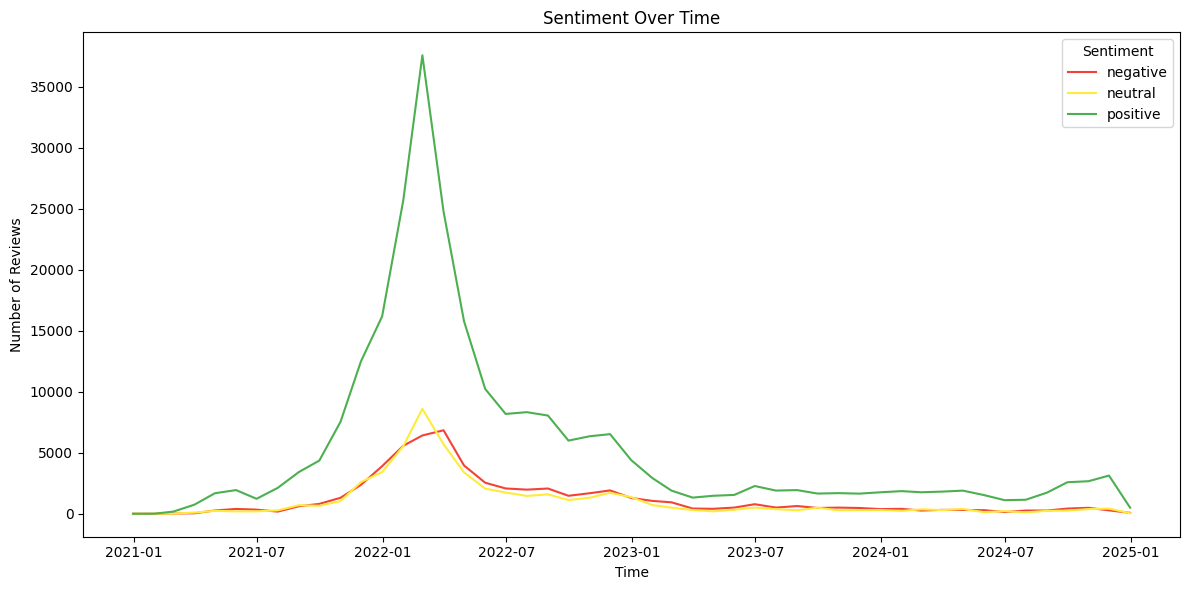

In [ ]:
# Group by month and category, then count occurrences
time_dist = df.groupby(pd.Grouper(key='date', freq='1M'))['category'].value_counts().unstack(fill_value=0)

# Plot the data using Seaborn's lineplot
plt.figure(figsize=(12, 6))

# Plot each sentiment line with its corresponding color
for sentiment in time_dist.columns:
    sns.lineplot(x=time_dist.index, y=time_dist[sentiment], label=sentiment, color=sentiment_colors.get(sentiment))

# Add labels and title
plt.title('Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

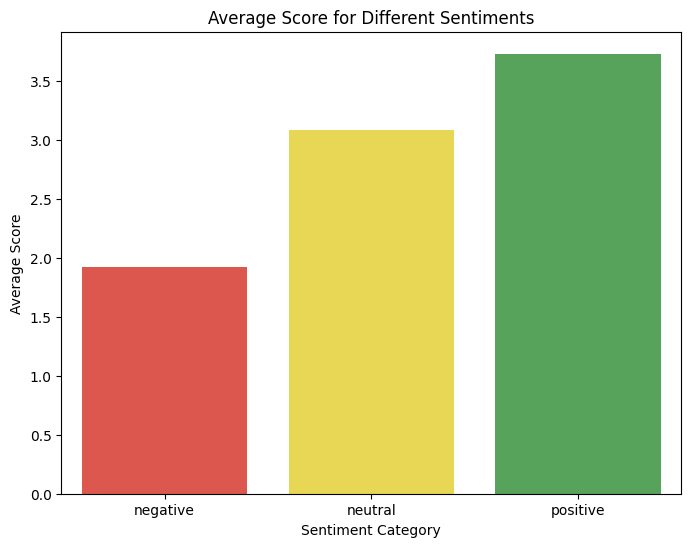

In [ ]:
# Group by sentiment category and calculate the average score
average_score_by_sentiment = df.groupby('category')['score'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=average_score_by_sentiment.index, y=average_score_by_sentiment.values, palette=[sentiment_colors[x] for x in average_score_by_sentiment.index])
plt.xlabel("Sentiment Category")
plt.ylabel("Average Score")
plt.title("Average Score for Different Sentiments")
plt.show()

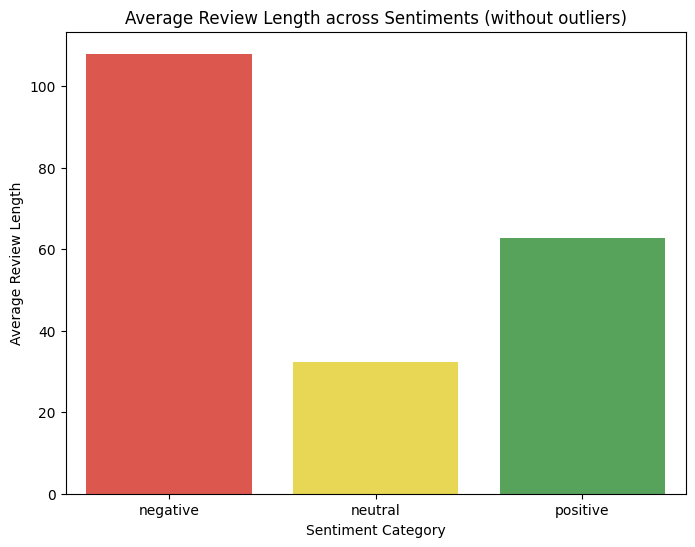

In [15]:
# Filter out outliers
df_no_outliers = df[(df['review_length'] >= lower_bound) & (df['review_length'] <= upper_bound)]

# Group data by sentiment and calculate the average review length
average_length_by_sentiment = df_no_outliers.groupby('category')['review_length'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=average_length_by_sentiment.index, y=average_length_by_sentiment.values, palette=[sentiment_colors[x] for x in average_length_by_sentiment.index])
plt.xlabel("Sentiment Category")
plt.ylabel("Average Review Length")
plt.title("Average Review Length across Sentiments (without outliers)")
plt.show()

The average length of reviews varies significantly across sentiments: negative reviews are the longest, indicating that dissatisfied users tend to provide more detailed feedback. Neutral reviews are the shortest, suggesting they may often be concise or lack strong emotions. Positive reviews fall in between, reflecting a balance between brevity and detail.

### Keywords and Phrases extraction

In [33]:
from sklearn.feature_extraction.text import CountVectorizer


def extract_ngrams(reviews, n, top_n=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), max_features=top_n, stop_words='english')
    ngram_counts = vectorizer.fit_transform(reviews)
    ngram_freq = zip(vectorizer.get_feature_names_out(), ngram_counts.toarray().sum(axis=0))
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return sorted_ngrams

In [32]:
cleaned_reviews = df['translated_review'].tolist()

In [39]:
# Extract unigrams, bigrams, and trigrams
top_unigrams = extract_ngrams(cleaned_reviews, 1)
top_bigrams = extract_ngrams(cleaned_reviews, 2)
top_trigrams = extract_ngrams(cleaned_reviews, 3)

# Create DataFrames
unigram_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Count'])
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Count'])

# Concatenate DataFrames
top_ngrams = pd.concat([unigram_df, bigram_df, trigram_df], axis=1)
top_ngrams

Unigram   Count         Bigram  Count  \
0          game  199525      nice game  13530   
1           fun   55071     great game  10309   
2         level   45895      good game   8925   
3          good   39085      love game   8612   
4           ads   37934       fun game   7933   
5          play   37009      like game   6282   
6   advertising   35159       game fun   5721   
7          time   33003      game good   4369   
8          like   32181    spend money   3817   
9          nice   31472      play game   3677   
10        coins   31405   playing game   3621   
11         just   29199    game really   3601   
12       levels   26477  relaxing game   3317   
13       really   25585    stuck level   3272   
14        great   24133      long time   3227   
15          don   23136    really like   3152   
16        lives   22824      game play   3138   
17        money   20825   just started   3133   
18     relaxing   20006     really fun   3036   
19         love   18562      game just   2880   

                                Trigram  Count  
0                      really like game   1643  
1                         way pass time   1093  
2                        ve stuck level   1043  
3                    actually nice game    954  
4                  just started playing    945  
5                       takes long time    884  
6                       game really fun    760  
7                   reach certain level    661  
8                     really enjoy game    560  
9                          game lot fun    555  
10                      wait 30 minutes    549  
11                nice game advertising    539  
12                   nice relaxing game    537  
13                      ve just started    517  
14  advertising advertising advertising    505  
15              nice game unfortunately    500  
16                       don waste time    455  
17                    really liked game    452  
18                        nice way pass    448  
19                       game pass time    404

### Keywords and Phrases from positive reviews

In [46]:
positive_reviews = df[df['category'] == 'positive']['processed_review'].tolist()
negative_reviews = df[df['category'] == 'negative']['processed_review'].tolist()

In [42]:
# Extract unigrams, bigrams, and trigrams
top_unigrams = extract_ngrams(positive_reviews, 1)
top_bigrams = extract_ngrams(positive_reviews, 2)
top_trigrams = extract_ngrams(positive_reviews, 3)

# Create DataFrames
unigram_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Count'])
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Count'])

# Concatenate DataFrames
top_positive_ngrams = pd.concat([unigram_df, bigram_df, trigram_df], axis=1)
top_positive_ngrams

Unigram   Count         Bigram  Count                Trigram  Count
0          game  157753      nice game  11753       really like game   1447
1           fun   51368     great game   9901           way pas time   1030
2         level   50534      good game   8271        ive stuck level    637
3          good   36171      love game   8052        game really fun    634
4            ad   30855       fun game   7375           game lot fun    583
5          play   29578      like game   5953     actually nice game    552
6          nice   28194       game fun   5093     nice relaxing game    537
7          like   27049      game good   3892    reach certain level    528
8          time   26091  relaxing game   3218      really enjoy game    469
9          coin   23401   playing game   3182  nice game advertising    441
10        great   22891      game play   2955           nice way pas    427
11         life   22429      play game   2930        really fun game    382
12       really   19625    game really   2882      really liked game    379
13     relaxing   18996    really like   2787   impossible pas level    378
14  advertising   18202     really fun   2781        dont waste time    371
15         love   17808    spend money   2674          game pas time    355
16           im   14915        lot fun   2629     im going uninstall    343
17         dont   14905     game great   2541      fun relaxing game    338
18      playing   14565        game ad   2503       really good game    332
19        money   13913  certain level   2295   level impossible pas    322

### Keywords and Phrases from negative reviews

In [43]:
# Extract unigrams, bigrams, and trigrams
top_unigrams = extract_ngrams(negative_reviews, 1)
top_bigrams = extract_ngrams(negative_reviews, 2)
top_trigrams = extract_ngrams(negative_reviews, 3)

# Create DataFrames
unigram_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Count'])
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Count'])

# Concatenate DataFrames
top_negative_ngrams = pd.concat([unigram_df, bigram_df, trigram_df], axis=1)
top_negative_ngrams

Unigram  Count                Bigram  Count  \
0            game  43104             nice game   1629   
1           level  18580             lose life   1498   
2              ad  13059           stuck level   1337   
3            life  10825             play game   1205   
4            time  10814             like game   1097   
5     advertising  10240           spend money    982   
6            dont   8052               game ad    917   
7            coin   7929             pas level    912   
8            play   7880  advertising annoying    845   
9        annoying   6183          daily puzzle    791   
10            bad   5888             good game    772   
11          money   5586             long time    766   
12         really   5327            waste time    758   
13             im   5308             dont want    732   
14           like   5230               ad game    719   
15            app   4111        complete level    661   
16            zen   3943              bad game    654   
17           make   3818             dont like    650   
18  advertisement   3786       really annoying    645   
19      difficult   3734          playing game    630   

                        Trigram  Count  
0               ive stuck level    406  
1            actually nice game    360  
2       nice game unfortunately    231  
3              really like game    231  
4                wait 30 minute    226  
5          impossible pas level    217  
6              stuck level week    196  
7                game lose life    189  
8               stuck level day    175  
9               ill delete game    168  
10          reach certain level    161  
11           im going uninstall    155  
12  advertising really annoying    154  
13             havent able play    143  
14              dont waste time    140  
15                wont let play    140  
16             doesnt look like    133  
17               game wont load    133  
18               dont feel like    126  
19             want spend money    126

- Keywords like "ads," "advertising," and "advertising advertising advertising" reflect significant dissatisfaction with intrusive or excessive ads. Players repeatedly express annoyance, which may impact user retention or app ratings.
- Phrases like "stuck level," "reach certain level," and "ve stuck level" point to frustration with difficulty spikes that hinder progress. This may indicate a need for better-balanced level designs or clearer instructions to guide players through challenging stages.
- Phrases such as "long time," "takes long time," and "wait 30 minutes" underline dissatisfaction with time-gating mechanics, which are common in free-to-play games. Players may prefer shorter waiting periods or alternative mechanics that don't obstruct gameplay flow.
- Words like "relaxing," "nice," and "fun" reveal that many players value mobile games as a way to unwind and pass the time. Bigrams like "nice relaxing game" and "fun game" highlight this preference for casual, enjoyable experiences.
- Neutral phrases like "just started playing" and "really like game" suggest new players tend to express initial enjoyment.
- Some phrases like "im going uninstall," "ill delete game," "dont waste time" reflect strong dissatisfaction, with users expressing intent to delete or uninstall the game.

### Wordclouds

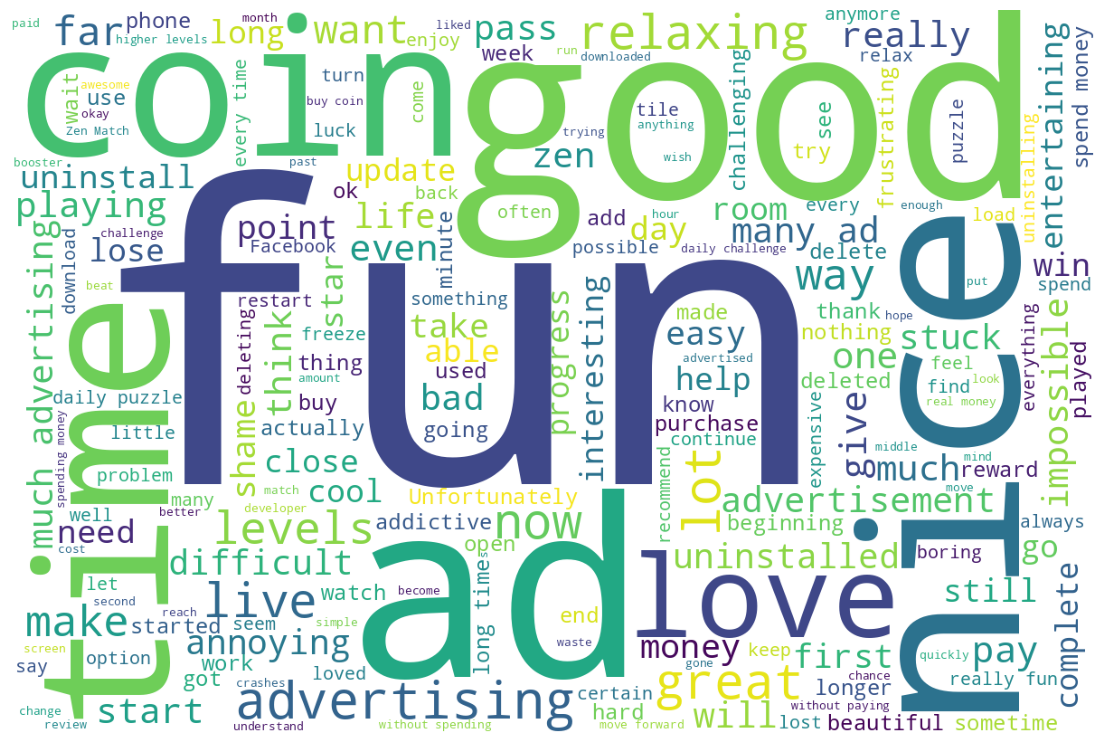

In [26]:
from wordcloud import WordCloud, STOPWORDS

# Define additional stopwords
additional_stopwords = {'game', 'games', 'level', 'play', 'app'}
STOPWORDS.update(additional_stopwords)

plt.figure(figsize=(14,10))
plt.imshow(WordCloud(stopwords=STOPWORDS, width=1200, height=800, background_color='white').generate(df['translated_review'].str.cat(sep=' ')))
plt.axis('off')
plt.show()

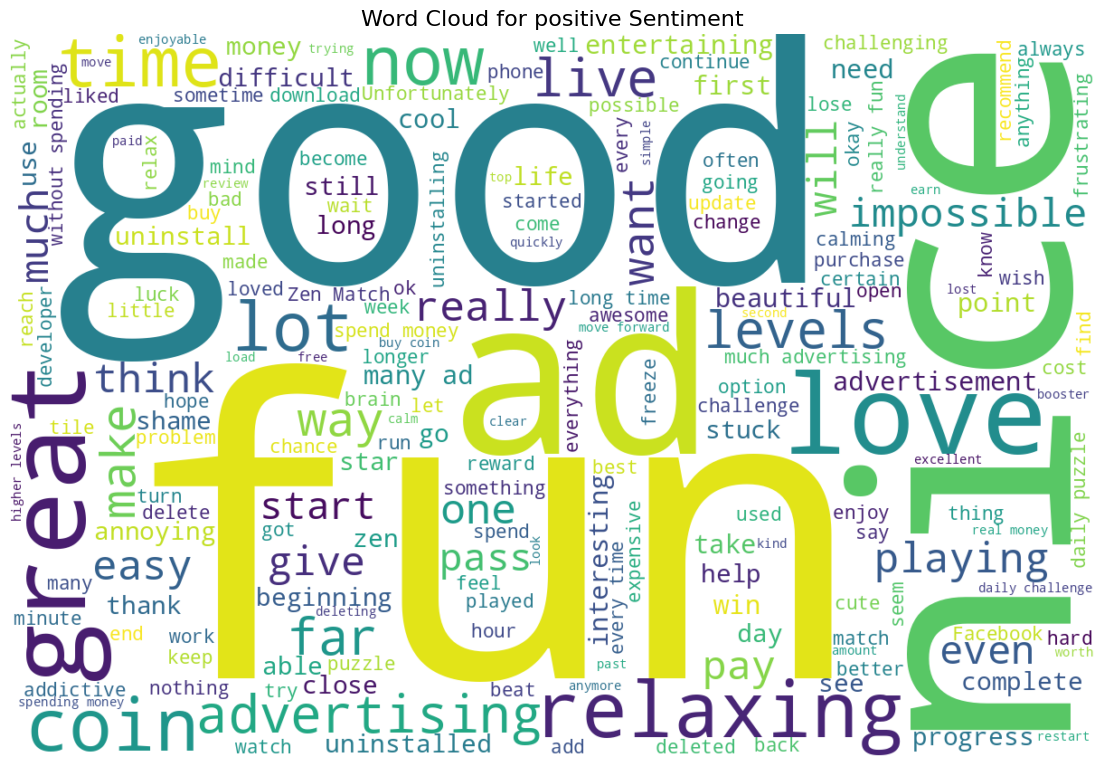

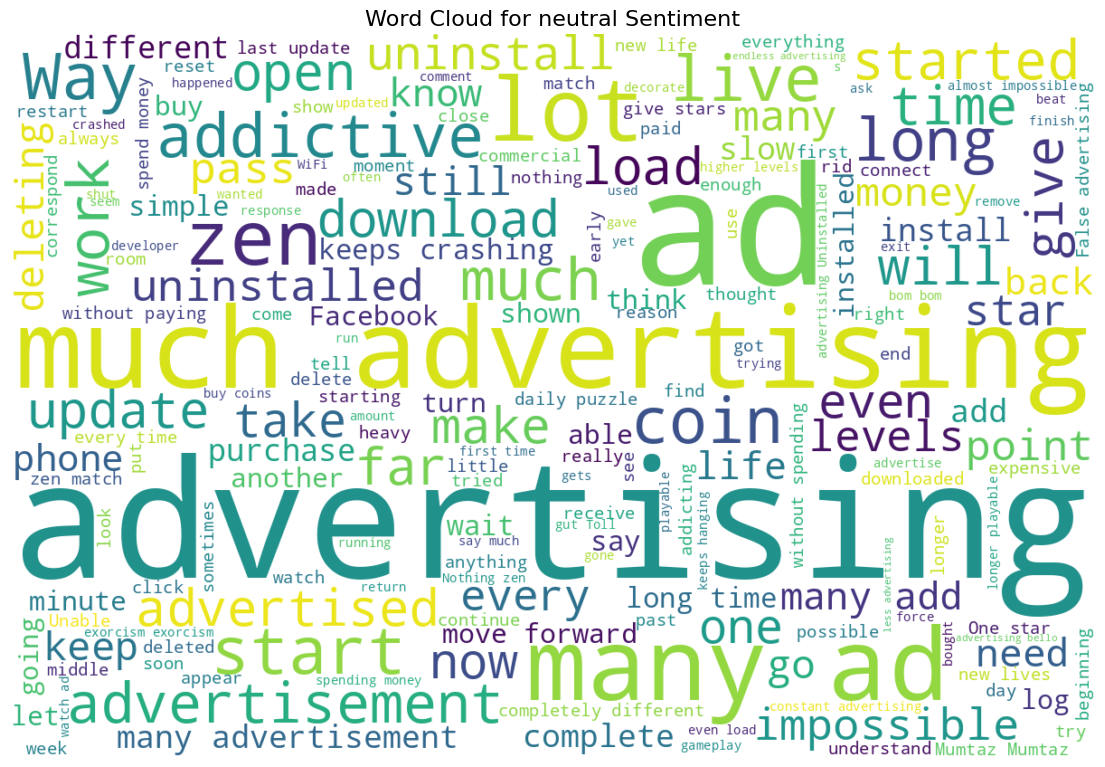

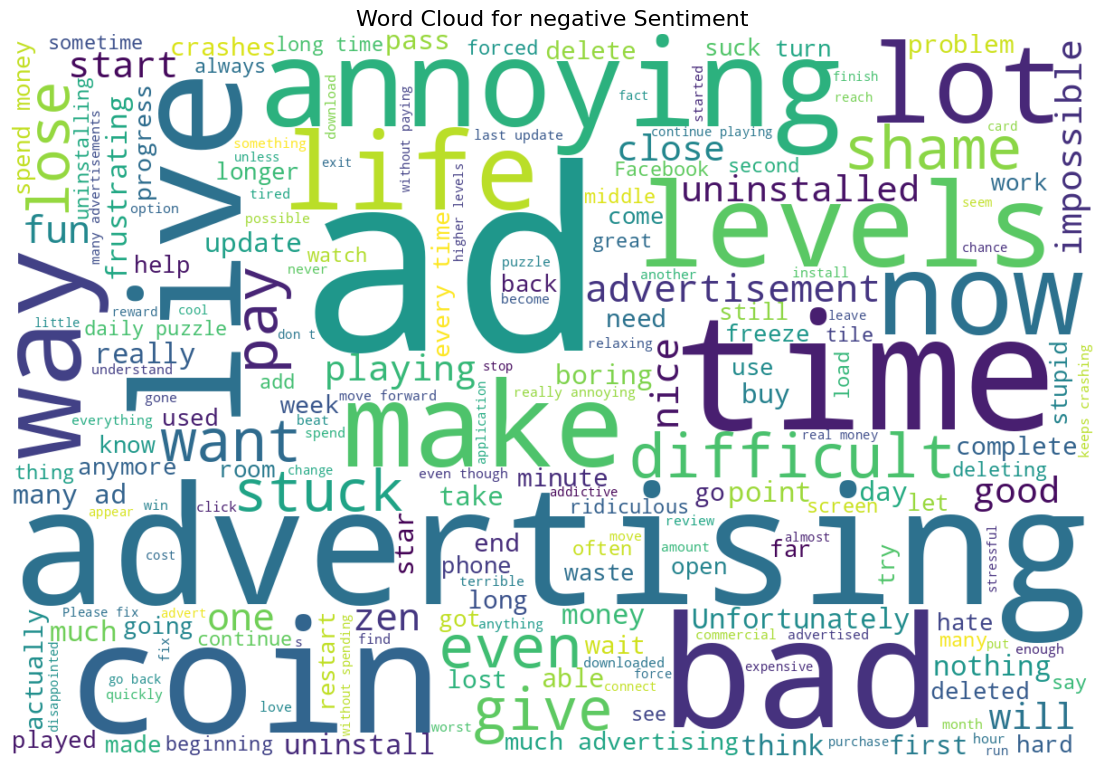

In [29]:
# Function to generate word cloud for a given sentiment
def generate_wordcloud_for_sentiment(sentiment_df, sentiment_name):
    # Combine all the reviews of a specific sentiment into one text
    text = sentiment_df['translated_review'].str.cat(sep=' ')

    # Generate word cloud
    wordcloud = WordCloud(stopwords=STOPWORDS, width=1200, height=800, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_name} Sentiment', fontsize=16)
    plt.show()

# Generate and display word clouds for each sentiment
for sentiment in df['category'].unique():
    sentiment_df = df[df['category'] == sentiment]
    generate_wordcloud_for_sentiment(sentiment_df, sentiment)
    print(" ")

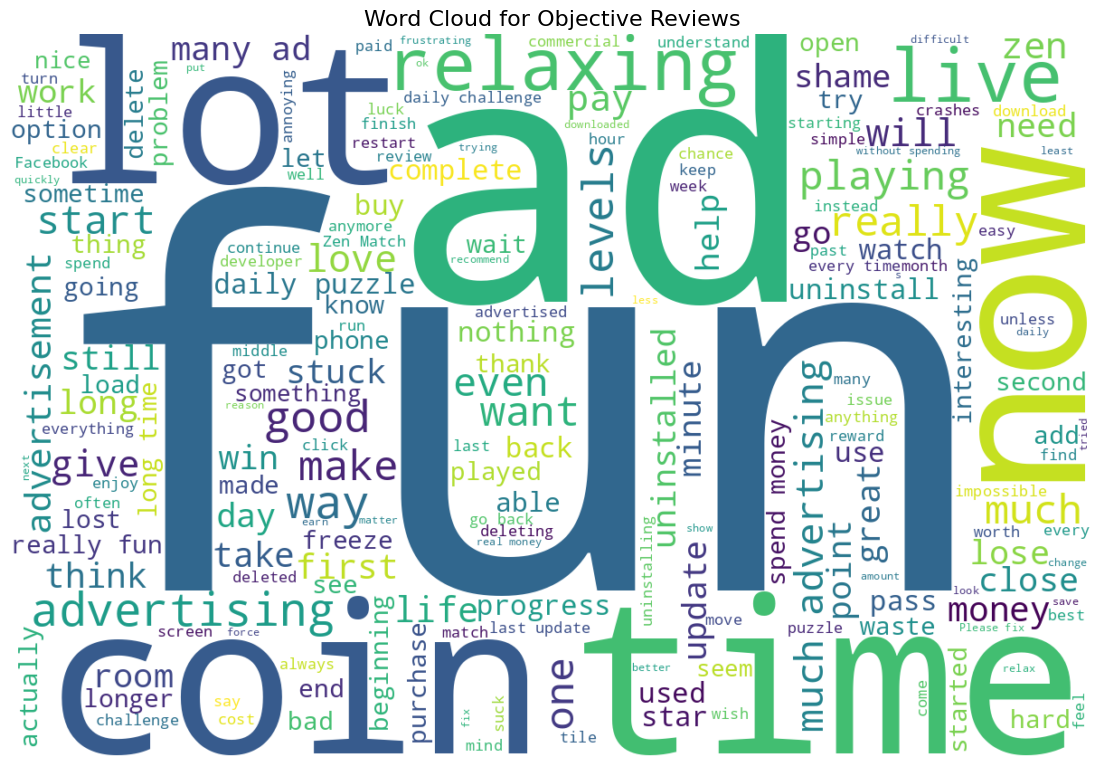

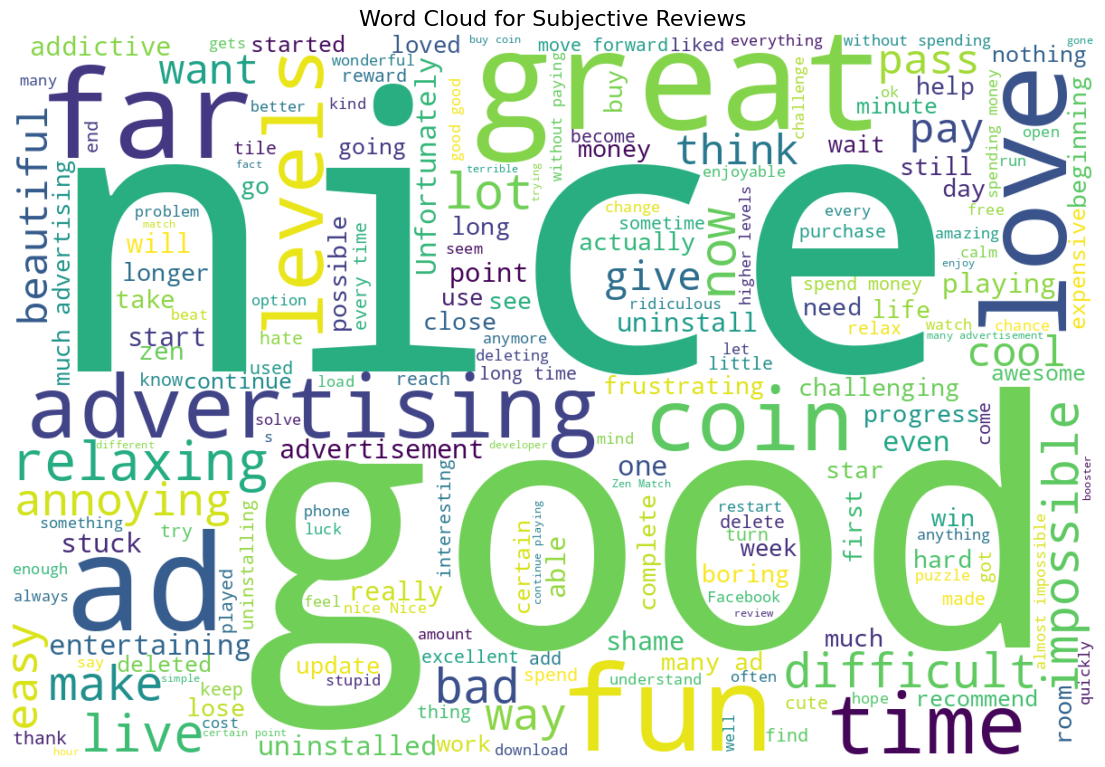

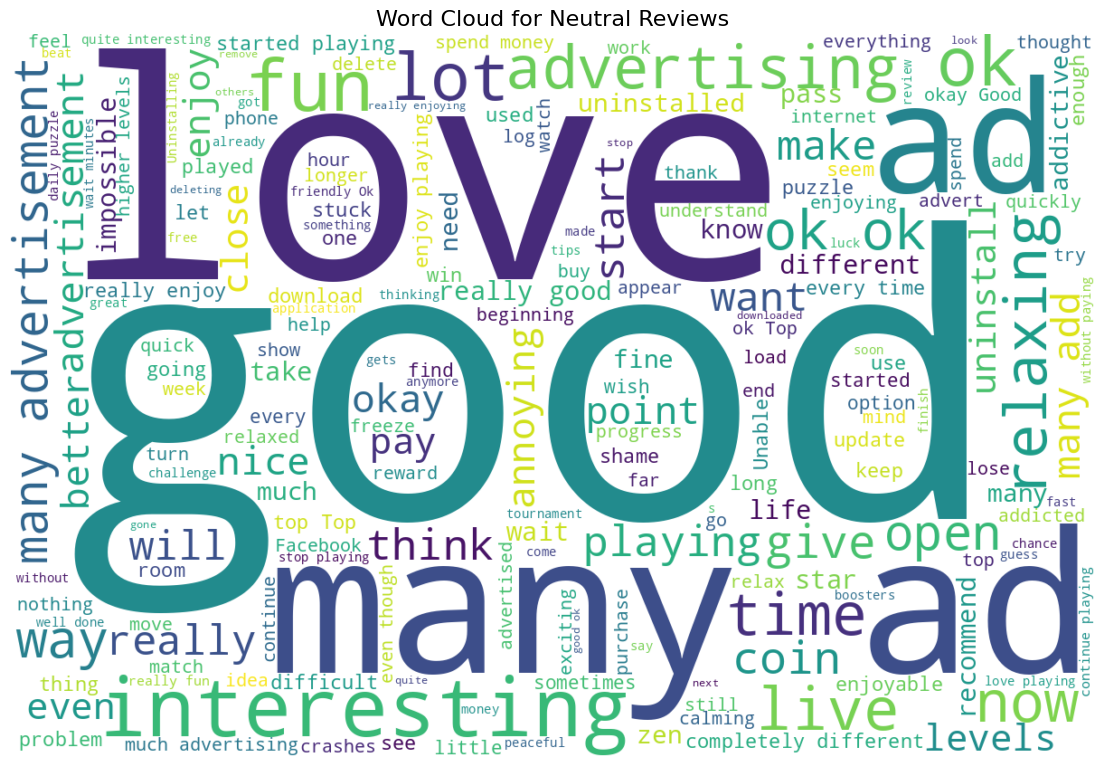

In [30]:
def generate_wordcloud_for_subjectivity(subjectivity_df, subjectivity_name):
    # Combine all the reviews of a specific subjectivity into one text
    text = subjectivity_df['translated_review'].str.cat(sep=' ')

    # Generate word cloud
    wordcloud = WordCloud(stopwords=STOPWORDS, width=1200, height=800, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {subjectivity_name} Reviews', fontsize=16)
    plt.show()

# Generate and display word clouds for each subjectivity category
for subjectivity in df['subjectivity_category'].unique():
    subjectivity_df = df[df['subjectivity_category'] == subjectivity]
    generate_wordcloud_for_subjectivity(subjectivity_df, subjectivity)
    print(" ")

## Summary and Insights

### Key Insights
- ***Temporal Trends in Review Volume***

  The number of reviews fluctuates over time, with spikes potentially aligning with updates, marketing campaigns, or significant game changes. Monitoring these spikes can help understand the impact of these events on user engagement.

- ***Peak Hours for Leaving Reviews***

  Most reviews are submitted during specific peak hours, likely aligning with users' free time (e.g., evenings or weekends). This provides an opportunity to engage users during these periods, such as prompting in-game surveys or feedback requests.

- ***Sentiment Distribution by Scores***

  A strong correlation exists between higher scores (4-5) and positive sentiments, indicating satisfied players appreciate the game overall.
  Low scores (1-2) are dominated by negative sentiments, primarily due to issues like ads, level difficulty, or monetization frustrations.
  Neutral sentiments (score 3) represent a mix of satisfaction and dissatisfaction, often highlighting improvement areas.

- ***Language Distribution***

  Reviews are predominantly in English, but other languages (e.g., German, Italian, Spanish) also appear frequently. Localized marketing efforts or in-game support in these languages could expand user satisfaction and retention.


- ***Length of Reviews***

  Positive reviews are often concise, focusing on praise for fun, relaxation, and gameplay.
  Negative reviews tend to be longer, emphasizing detailed frustrations with ads, difficulty, and monetization strategies.

- ***Replies and Engagement***

  Developers' replies to reviews, particularly negative ones, can improve user perception and retention. Engaging with users who leave constructive feedback could turn dissatisfaction into loyalty.

### Recommendations

- ***Optimize Ad Experience***

  Minimize intrusive ads and consider offering an ad-free premium option or reward-based ads to reduce negative feedback.

- ***Adjust Game Balance***

  Tweak level difficulty to ensure a smoother learning curve, especially for new players, without sacrificing long-term engagement.

- ***Address Pain Points in Low Ratings***

  Implement surveys or in-game prompts to better understand frustrations from 1- and 2-star reviewers. Use this feedback to make targeted improvements.

- ***Enhance Positive Features***

  Highlight features players love, like relaxation and fun gameplay, in marketing campaigns to attract similar audiences.

- ***Use Data for Iterative Improvements***

  Continuously monitor sentiment trends and keyword usage post-update to assess the impact of changes on player satisfaction.

By following these recommendations, the game can reduce churn, improve satisfaction, and strengthen player loyalty.